In [1]:
import pandas as pd
import plotly.express as px


Matplotlib is building the font cache; this may take a moment.


In [13]:
db = pd.read_csv('clean.csv')

In [19]:
data = db.groupby(['date', 'sentiment']).size().reset_index(name='NoOfSentiments')
data = data.sort_values(by="date")

fig = px.line(data, x="date", y="NoOfSentiments", color='sentiment', labels={'date': 'Year', 'NoOfSentiments': 'Sentiment Count'})
fig.show()

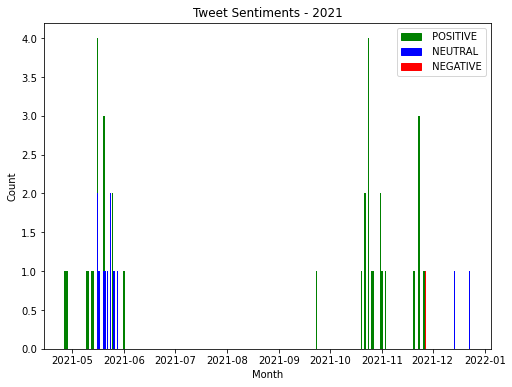

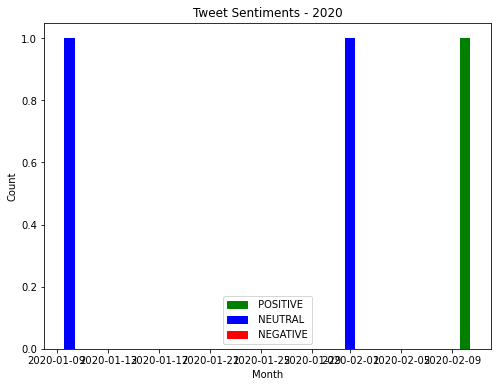

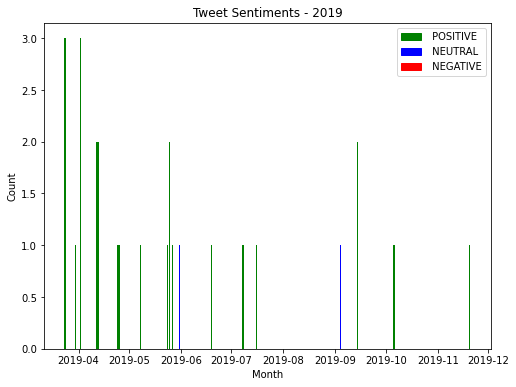

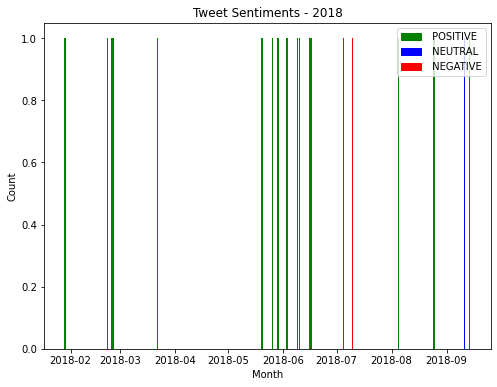

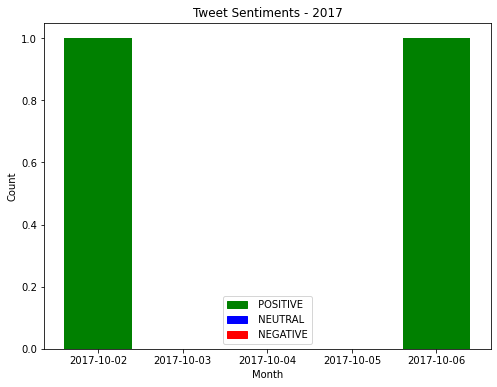

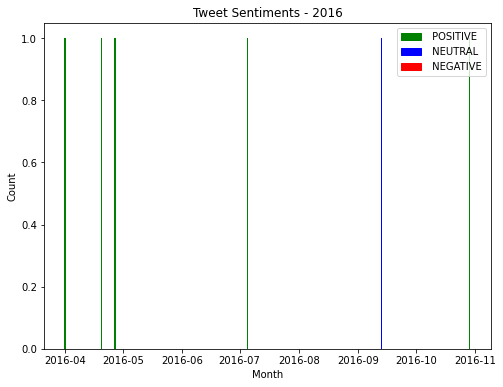

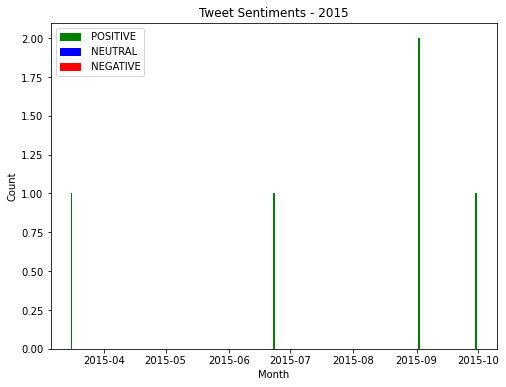

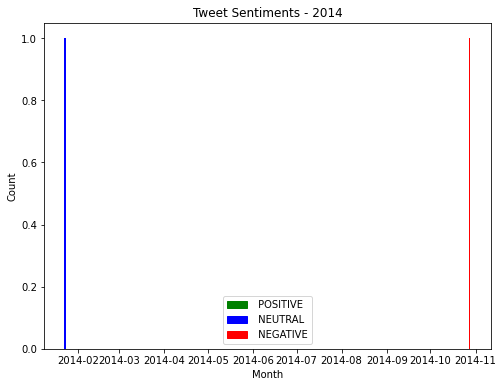

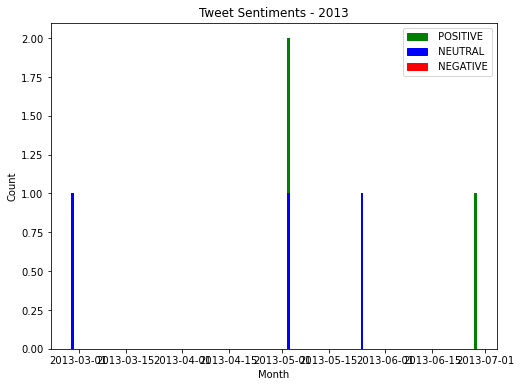

In [53]:
import matplotlib.pyplot as plt

song_sent = pd.DataFrame(db.groupby(['date', 'sentiment'])['tweet'].count())
song_sent.columns = ['TweetCount']

song_sent = song_sent.reset_index()
song_sent['date'] = pd.to_datetime(song_sent['date'])  # Converter para formato de data
song_sent = song_sent.sort_values(by=['date', 'TweetCount'], ascending=False)

unique_years = song_sent['date'].dt.year.unique()

for year in unique_years:
    data_year = song_sent[song_sent['date'].dt.year == year]
    
    plt.figure(figsize=(8, 6))
    bars = plt.bar(data_year['date'], data_year['TweetCount'], color=data_year['sentiment'].map(color_mapping))
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.title(f'Tweet Sentiments - {year}')
    
    # Criar legenda com as cores correspondentes aos sentimentos
    legend_labels = list(color_mapping.keys())
    legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color_mapping[sentiment]) for sentiment in legend_labels]
    plt.legend(legend_handles, legend_labels)
    
    plt.show()


[91, 6, 25]


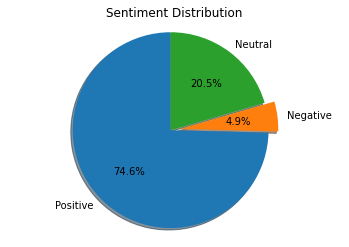

In [40]:
import matplotlib.pyplot as plt

# Filtering tweets with positive, negative, and neutral sentiments separately
pos_sent = db[db['sentiment'] == ' POSITIVE']
neg_sent = db[db['sentiment'] == ' NEGATIVE']
neu_sent = db[db['sentiment'] == ' NEUTRAL']

# Calculating the count for each sentiment category
pos_count = len(pos_sent)
neg_count = len(neg_sent)
neu_count = len(neu_sent)

# Creating the pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [pos_count, neg_count, neu_count]
print(sizes)
explode = (0, 0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Sentiment Distribution')
plt.show()
